# Exercise Sheet 1
***

In [61]:
import numpy as np
import pandas as pd
from scipy.spatial.distance import cdist
import time
import matplotlib.pyplot as plt


**Task 1.0:**

In [3]:
np.random.seed(42)

z = np.random.randint(0, 3, 10_000)

In [4]:
def find_seq_1(arr, seq=(2,0,1)):
    
    count = 0

    for idx in range(len(arr) - len(seq) + 1):
        if arr[idx] == seq[0]:
            pot_seq = True
            for l in range(1, len(seq)):
                if arr[idx + l] != seq[l]:
                    pot_seq = False
                    break
            if pot_seq:
                count += 1

    return count

print(find_seq_1(z))


337


In [5]:
def find_seq_2(arr, seq=(2,0,1)):

    valid_range = len(arr) - len(seq) + 1

    matches = np.ones(valid_range, dtype=bool)

    for l in range(len(seq)):
        current_match = (arr[l:valid_range+l] == seq[l])
        matches = np.logical_and(matches, current_match)
    
    return np.sum(matches)

print(find_seq_2(z))

337


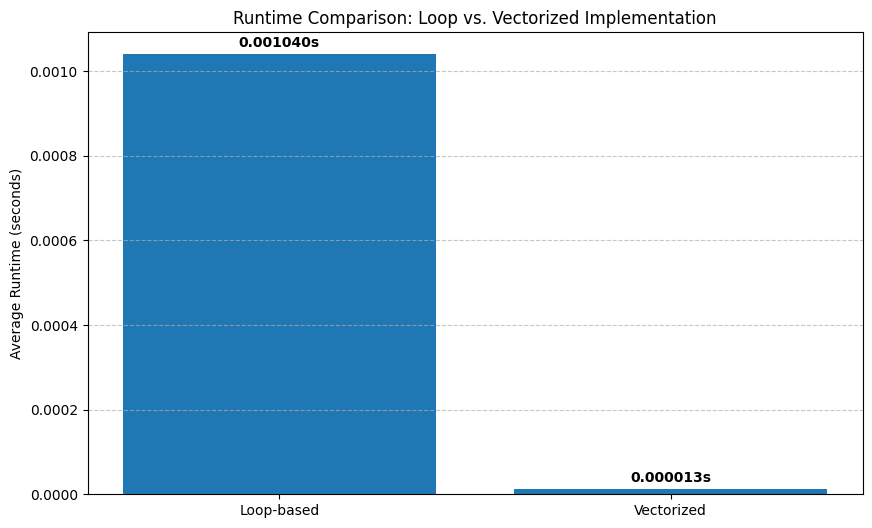

In [6]:
num_runs = 100 

start_time = time.time()
for _ in range(num_runs):
    find_seq_1(z) 
loop_time = (time.time() - start_time) / num_runs

start_time = time.time()
for _ in range(num_runs):
    find_seq_2(z)
vectorized_time = (time.time() - start_time) / num_runs

implementations = ['Loop-based', 'Vectorized']
times = [loop_time, vectorized_time]

plt.figure(figsize=(10, 6))
plt.bar(implementations, times)
plt.title('Runtime Comparison: Loop vs. Vectorized Implementation')
plt.ylabel('Average Runtime (seconds)')
plt.grid(axis='y', linestyle='--', alpha=0.7)

for i, time_val in enumerate(times):
    plt.text(i, time_val + max(times)*0.01, f'{time_val:.6f}s', 
             ha='center', va='bottom', fontweight='bold')

plt.show()

Notes:
- The function 1 does ...
- The function 2 does ...
- One can see an insane speed up of factor ...

**Task 1.1:**

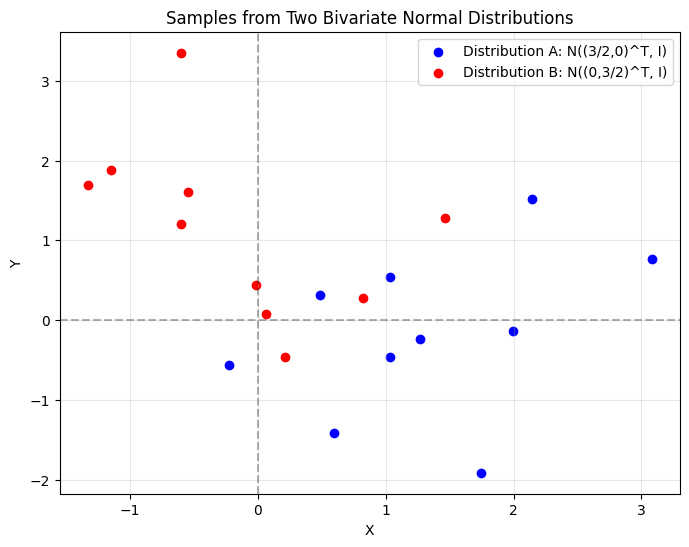

In [7]:
np.random.seed(42)

mean_a = np.array([3/2, 0])
cov_a = np.eye(2)
a = np.random.multivariate_normal(mean_a, cov_a, 10)

mean_b = np.array([0, 3/2])
cov_b = np.eye(2)
b = np.random.multivariate_normal(mean_b, cov_b, 10)

plt.figure(figsize=(8, 6))
plt.scatter(a[:, 0], a[:, 1], color='blue', label='Distribution A: N((3/2,0)^T, I)')
plt.scatter(b[:, 0], b[:, 1], color='red', label='Distribution B: N((0,3/2)^T, I)')

plt.title('Samples from Two Bivariate Normal Distributions')
plt.xlabel('X')
plt.ylabel('Y')
plt.axhline(y=0, color='k', linestyle='--', alpha=0.3)
plt.axvline(x=0, color='k', linestyle='--', alpha=0.3)
plt.grid(alpha=0.3)
plt.legend()
plt.show()

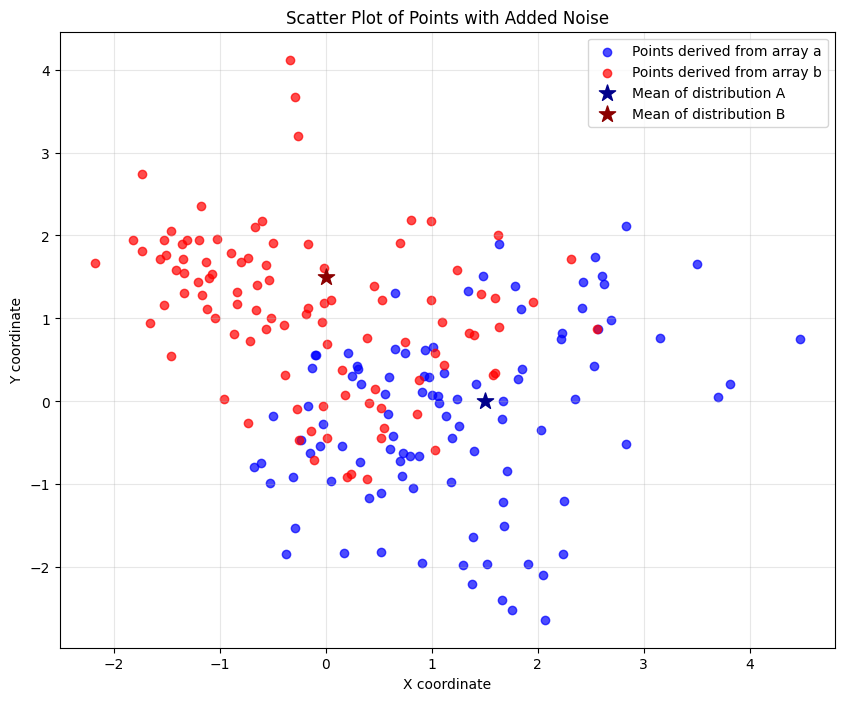

In [8]:
np.random.seed(42)

x = np.zeros((200,2))
mean = np.zeros((2,))
cov = (1/4) * np.eye(2)

idx_a = np.random.randint(0,10,100)
noise_a = np.random.multivariate_normal(mean, cov, 100)

x[0:100] = a[idx_a] + noise_a

idx_b = np.random.randint(0,10,100)
noise_b = np.random.multivariate_normal(mean, cov, 100)

x[100:200] = b[idx_b] + noise_b

plt.figure(figsize=(10, 8))
plt.scatter(x[0:100, 0], x[0:100, 1], color='blue', label='Points derived from array a', alpha=0.7)
plt.scatter(x[100:200, 0], x[100:200, 1], color='red', label='Points derived from array b', alpha=0.7)

plt.grid(alpha=0.3)
plt.xlabel('X coordinate')
plt.ylabel('Y coordinate')
plt.title('Scatter Plot of Points with Added Noise')
plt.legend()

plt.scatter([3/2], [0], color='darkblue', s=150, marker='*', label='Mean of distribution A', zorder=5)
plt.scatter([0], [3/2], color='darkred', s=150, marker='*', label='Mean of distribution B', zorder=5)
plt.legend()

plt.show()

y = np.zeros(200)
y[0:100] = 0
y[100:200] = 1


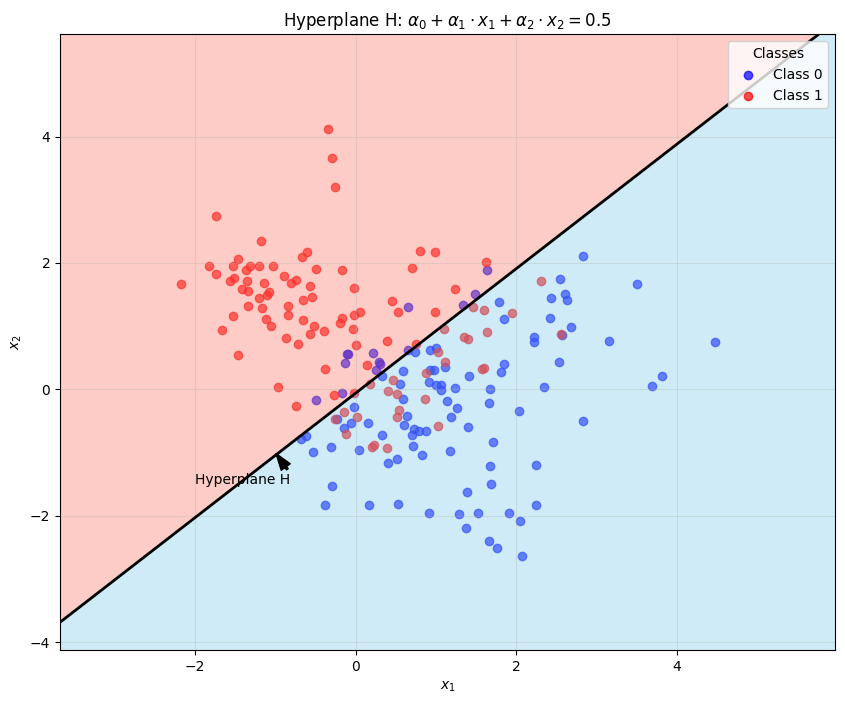

Coefficients: α₀ = 0.5107, α₁ = -0.1699, α₂ = 0.1725


In [9]:
def linear_least_squares(X, y):
    """
    Implements linear least squares algorithm.
    X: Input data, shape (n_samples, n_features)
    y: Target labels, shape (n_samples,)
    Returns: coefficient vector alpha
    """
    
    X_hat = np.column_stack((np.ones(X.shape[0]), X))
    
    XTX = X_hat.T @ X_hat
    XTy = X_hat.T @ y
    alpha = np.linalg.solve(XTX, XTy)
    
    return alpha

alpha = linear_least_squares(x, y)

plt.figure(figsize=(10, 8))

plt.scatter(x[y==0, 0], x[y==0, 1], color='blue', label='Class 0', alpha=0.7)
plt.scatter(x[y==1, 0], x[y==1, 1], color='red', label='Class 1', alpha=0.7)

margin = 1.5  # Add more margin around data points
x1_min, x1_max = x[:, 0].min() - margin, x[:, 0].max() + margin
x2_min, x2_max = x[:, 1].min() - margin, x[:, 1].max() + margin

xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max, 300),
                       np.linspace(x2_min, x2_max, 300))

Z = alpha[0] + alpha[1] * xx1 + alpha[2] * xx2

plt.contour(xx1, xx2, Z, levels=[0.5], colors='k', linestyles='-', linewidths=2)

plt.contourf(xx1, xx2, Z, levels=[-float('inf'), 0.5, float('inf')], 
             colors=['skyblue', 'salmon'], alpha=0.4)

plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.title('Hyperplane H: $\\alpha_0 + \\alpha_1 \\cdot x_1 + \\alpha_2 \\cdot x_2 = 0.5$')

# Add legend
plt.legend(title="Classes")

plt.annotate('Hyperplane H', xy=(-1, -1), xytext=(-2, -1.5),
             arrowprops=dict(facecolor='black', shrink=0.05, width=1.5, headwidth=8),
             fontsize=10)

plt.grid(True, alpha=0.3)
plt.show()

print(f"Coefficients: α₀ = {alpha[0]:.4f}, α₁ = {alpha[1]:.4f}, α₂ = {alpha[2]:.4f}")

In [10]:
def confusion_matrix(X, y, alpha, threshold=0.5):
    """
    Builds the confusion matrix for a linear classifier.
    
    Parameters:
    X -- input features (n_samples, n_features)
    y -- true labels (n_samples,)
    alpha -- model coefficients [alpha_0, alpha_1, ...]
    threshold -- decision threshold (default 0.5)
    
    Returns:
    C -- confusion matrix as a 2x2 numpy array
    """
    X_hat = np.column_stack((np.ones(X.shape[0]), X))
    y_pred = X_hat @ alpha
    y_pred_binary = (y_pred >= threshold).astype(int)
    y_int = y.astype(int)

    C = np.zeros((2, 2), dtype=int)
    
    for i in range(len(y)):
        C[y_pred_binary[i], y_int[i]] += 1
    
    return C

C = confusion_matrix(x, y, alpha)

accuracy = np.trace(C) / np.sum(C)

print("Confusion Matrix:")
print(C)
print(f"Accuracy: {accuracy:.4f} ({accuracy*100:.2f}%)")

print("\nConfusion Matrix Interpretation:")
print(f"True Negatives (predicted 0, actual 0): {C[0, 0]}")
print(f"False Positives (predicted 1, actual 0): {C[1, 0]}")
print(f"False Negatives (predicted 0, actual 1): {C[0, 1]}")
print(f"True Positives (predicted 1, actual 1): {C[1, 1]}")

Confusion Matrix:
[[86 29]
 [14 71]]
Accuracy: 0.7850 (78.50%)

Confusion Matrix Interpretation:
True Negatives (predicted 0, actual 0): 86
False Positives (predicted 1, actual 0): 14
False Negatives (predicted 0, actual 1): 29
True Positives (predicted 1, actual 1): 71


Test Data Confusion Matrix:
[[8702 2778]
 [1298 7222]]
Test Accuracy: 0.7962 (79.62%)

Comparison of Results:
Training Accuracy: 0.7850 (78.50%)
Test Accuracy: 0.7962 (79.62%)


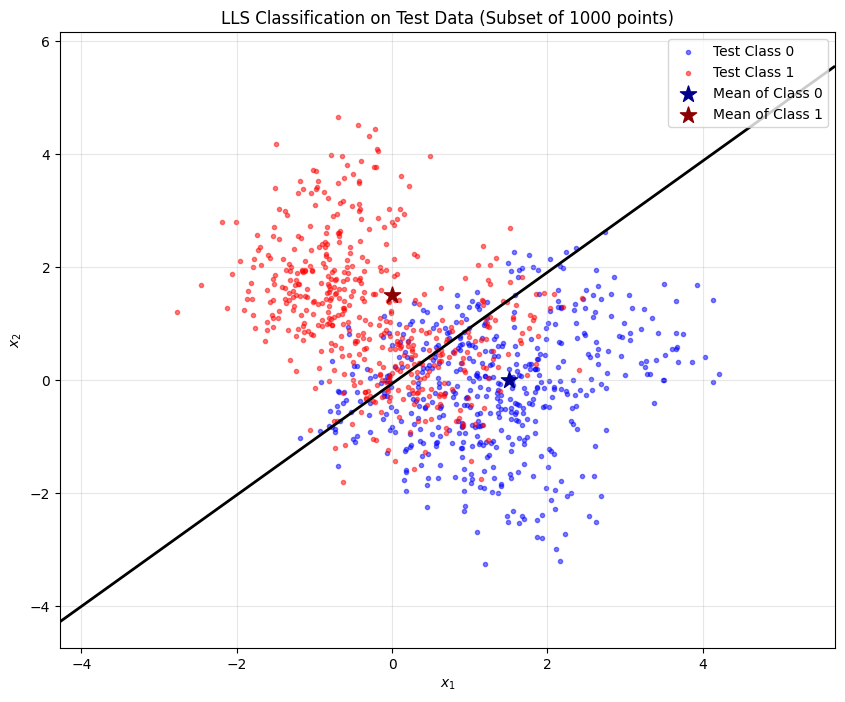

In [11]:
np.random.seed(42)

mean_a = np.array([3/2, 0])
cov_a = np.eye(2)
a = np.random.multivariate_normal(mean_a, cov_a, 10)

mean_b = np.array([0, 3/2])
cov_b = np.eye(2)
b = np.random.multivariate_normal(mean_b, cov_b, 10)

x_2 = np.zeros((20_000,2))
mean = np.zeros((2,))
cov = (1/4) * np.eye(2)

idx_a = np.random.randint(0,10,10_000)
noise_a = np.random.multivariate_normal(mean, cov, 10_000)

x_2[0:10_000] = a[idx_a] + noise_a

idx_b = np.random.randint(0,10,10_000)
noise_b = np.random.multivariate_normal(mean, cov, 10_000)

x_2[10_000:20_000] = b[idx_b] + noise_b

y_2 = np.zeros(20000)
y_2[10000:20000] = 1

C_test = confusion_matrix(x_2, y_2, alpha)
accuracy_test = np.trace(C_test) / np.sum(C_test)

print("Test Data Confusion Matrix:")
print(C_test)
print(f"Test Accuracy: {accuracy_test:.4f} ({accuracy_test*100:.2f}%)")

print("\nComparison of Results:")
print(f"Training Accuracy: {accuracy:.4f} ({accuracy*100:.2f}%)")
print(f"Test Accuracy: {accuracy_test:.4f} ({accuracy_test*100:.2f}%)")

plt.figure(figsize=(10, 8))
test_subset_indices = np.random.choice(len(x_2), 1000, replace=False)
x_test_subset = x_2[test_subset_indices]
y_test_subset = y_2[test_subset_indices]

plt.scatter(x_test_subset[y_test_subset==0, 0], x_test_subset[y_test_subset==0, 1], 
            color='blue', label='Test Class 0', alpha=0.5, marker='.')
plt.scatter(x_test_subset[y_test_subset==1, 0], x_test_subset[y_test_subset==1, 1], 
            color='red', label='Test Class 1', alpha=0.5, marker='.')

margin = 1.5
x1_min, x1_max = x_test_subset[:, 0].min() - margin, x_test_subset[:, 0].max() + margin
x2_min, x2_max = x_test_subset[:, 1].min() - margin, x_test_subset[:, 1].max() + margin
xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max, 100), 
                      np.linspace(x2_min, x2_max, 100))

Z = alpha[0] + alpha[1] * xx1 + alpha[2] * xx2

plt.contour(xx1, xx2, Z, levels=[0.5], colors='black', linewidths=2)

plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.title('LLS Classification on Test Data (Subset of 1000 points)')
plt.grid(alpha=0.3)
plt.legend()

plt.scatter([3/2], [0], color='darkblue', s=150, marker='*', 
            label='Mean of Class 0', zorder=5)
plt.scatter([0], [3/2], color='darkred', s=150, marker='*', 
            label='Mean of Class 1', zorder=5)
plt.legend()

plt.show()

In [12]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
column_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']
irisDataFrame = pd.read_csv(url , header=None, names=column_names)

# some small experimentation since i never worked with pandas before
irisDataFrame.shape
print(irisDataFrame)
print(irisDataFrame['class'].unique())
irisDataFrame.groupby('class').mean()

     sepal_length  sepal_width  petal_length  petal_width           class
0             5.1          3.5           1.4          0.2     Iris-setosa
1             4.9          3.0           1.4          0.2     Iris-setosa
2             4.7          3.2           1.3          0.2     Iris-setosa
3             4.6          3.1           1.5          0.2     Iris-setosa
4             5.0          3.6           1.4          0.2     Iris-setosa
..            ...          ...           ...          ...             ...
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
149           5.9          3.0           5.1          1.8  Iris-virginica

[150 rows x 5 columns]
['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


,sepal_length,sepal_width,petal_length,petal_width
class,,,,
Iris-setosa,5.006,3.418,1.464,0.244
Iris-versicolor,5.936,2.770,4.260,1.326
Iris-virginica,6.588,2.974,5.552,2.026


In [13]:

# print("Original Iris dataset:")
# print(irisDataFrame.head())

# Check the unique classes
print("\nUnique classes in the dataset:")
print(irisDataFrame['class'].unique())

irisDataFrame['label'] = (irisDataFrame['class'] != 'Iris-setosa').astype(int)

# print("\nDataset with binary labels:")
# print(irisDataFrame.head()) 

print("\nCount of each label:")
print(irisDataFrame['label'].value_counts())

print("\nClass distribution by label:")
print(irisDataFrame.groupby(['label', 'class']).size())




Unique classes in the dataset:
['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']

Count of each label:
label
1    100
0     50
Name: count, dtype: int64

Class distribution by label:
label  class          
0      Iris-setosa        50
1      Iris-versicolor    50
       Iris-virginica     50
dtype: int64


Coefficients for Iris dataset (using first two features):
α₀ = 0.2069, α₁ = 0.3771, α₂ = -0.5709


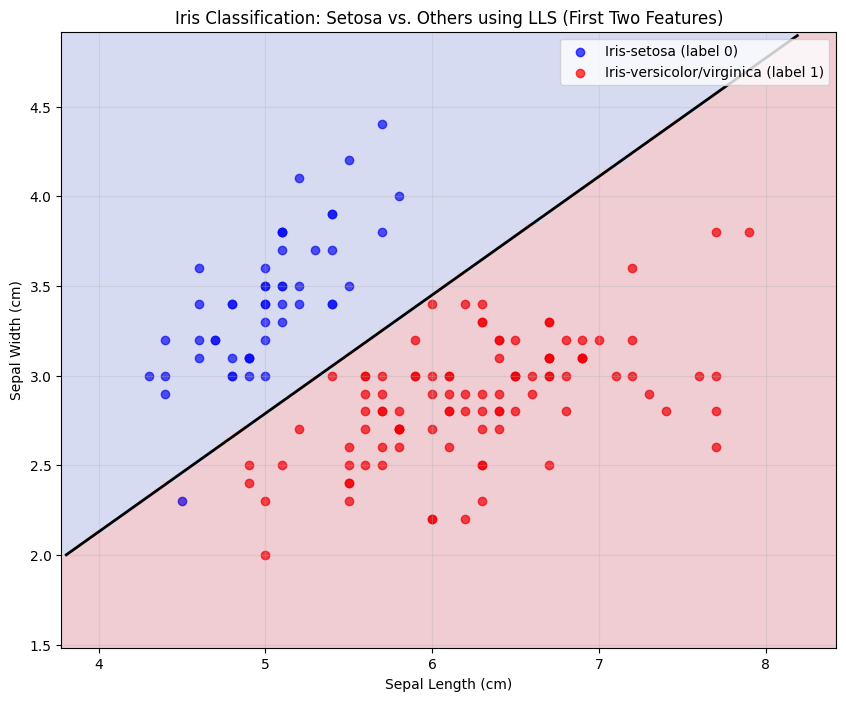

In [22]:
X_iris = irisDataFrame[['sepal_length', 'sepal_width']].values
y_iris = irisDataFrame['label'].values

alpha_iris = linear_least_squares(X_iris, y_iris)

print("Coefficients for Iris dataset (using first two features):")
print(f"α₀ = {alpha_iris[0]:.4f}, α₁ = {alpha_iris[1]:.4f}, α₂ = {alpha_iris[2]:.4f}")

# Plot the Iris data and the separating hyperplane
plt.figure(figsize=(10, 8))

plt.scatter(X_iris[y_iris==0, 0], X_iris[y_iris==0, 1], color='blue', 
            label='Iris-setosa (label 0)', alpha=0.7)
plt.scatter(X_iris[y_iris==1, 0], X_iris[y_iris==1, 1], color='red', 
            label='Iris-versicolor/virginica (label 1)', alpha=0.7)

margin = 0.5
x1_min, x1_max = X_iris[:, 0].min() - margin, X_iris[:, 0].max() + margin
x2_min, x2_max = X_iris[:, 1].min() - margin, X_iris[:, 1].max() + margin
xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max, 100), 
                      np.linspace(x2_min, x2_max, 100))

Z = alpha_iris[0] + alpha_iris[1] * xx1 + alpha_iris[2] * xx2

Z_binary = Z >= 0.5

plt.pcolormesh(xx1, xx2, Z_binary, cmap=plt.cm.coolwarm, alpha=0.2, shading='auto')

plt.contour(xx1, xx2, Z, levels=[0.5], colors='black', linewidths=2)

plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('Iris Classification: Setosa vs. Others using LLS (First Two Features)')
plt.grid(alpha=0.3)
plt.legend()

plt.show()

##### this is only because i wondered why it seems like there are not enough points in the plot ##########

# unique_combinations = irisDataFrame[['sepal_length', 'sepal_width']].drop_duplicates().shape[0]
# total_samples = irisDataFrame.shape[0]

# print(f"Total samples in Iris dataset: {total_samples}")
# print(f"Unique combinations of sepal length and sepal width: {unique_combinations}")
# print(f"Number of duplicate points: {total_samples - unique_combinations}")

# combo_counts = irisDataFrame.groupby(['sepal_length', 'sepal_width']).size()
# duplicates = combo_counts[combo_counts > 1]

# print("\nCombinations that appear multiple times:")
# print(duplicates)


In [21]:
# Select all four features for the LLS algorithm
X_iris_full = irisDataFrame[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].values
y_iris_full = irisDataFrame['label'].values

# Apply LLS to all four features
alpha_iris_full = linear_least_squares(X_iris_full, y_iris_full)

print("Coefficients for Iris dataset (using all four features):")
print(f"α₀ = {alpha_iris_full[0]:.4f}, α₁ = {alpha_iris_full[1]:.4f}, " + 
      f"α₂ = {alpha_iris_full[2]:.4f}, α₃ = {alpha_iris_full[3]:.4f}, " + 
      f"α₄ = {alpha_iris_full[4]:.4f}")

conf_matrix = confusion_matrix(X_iris_full, y_iris_full, alpha_iris_full)

accuracy_full = np.trace(conf_matrix) / np.sum(conf_matrix)

print("\nConfusion Matrix:")
print(conf_matrix)
print(f"Accuracy using all four features: {accuracy_full:.4f} ({accuracy_full*100:.2f}%)")

# Interpretation of the confusion matrix
print("\nConfusion Matrix Interpretation:")
print(f"True Negatives (predicted 0, actual 0): {conf_matrix[0, 0]}")
print(f"False Positives (predicted 1, actual 0): {conf_matrix[1, 0]}")
print(f"False Negatives (predicted 0, actual 1): {conf_matrix[0, 1]}")
print(f"True Positives (predicted 1, actual 1): {conf_matrix[1, 1]}")

Coefficients for Iris dataset (using all four features):
α₀ = 0.8775, α₁ = -0.0656, α₂ = -0.2425, α₃ = 0.2228, α₄ = 0.0634

Confusion Matrix:
[[ 50   0]
 [  0 100]]
Accuracy using all four features: 1.0000 (100.00%)

Confusion Matrix Interpretation:
True Negatives (predicted 0, actual 0): 50
False Positives (predicted 1, actual 0): 0
False Negatives (predicted 0, actual 1): 0
True Positives (predicted 1, actual 1): 100


In [51]:
def gradient_descent_lls(X, y, step_size=0.01, max_steps=10000, tol=1e-6):
    """
    Implements gradient descent to solve the LLS problem.
    
    Parameters:
    X -- Input data, shape (n_samples, n_features)
    y -- Target labels, shape (n_samples,)
    step_size -- Learning rate (nu)
    max_steps -- Maximum number of iterations
    tol -- Tolerance for convergence
    
    Returns:
    alpha -- Learned coefficients
    J_history -- History of the cost function values
    converged -- Boolean indicating whether the algorithm converged
    """
    n_samples = X.shape[0]
    

    X_hat = np.column_stack((np.ones(n_samples), X))
    n_features = X_hat.shape[1]
    

    np.random.seed(42)
    alpha = np.random.randn(n_features)
    

    J_history = []
    converged = False

    for step in range(max_steps):

        y_pred = X_hat @ alpha
        
        J = (1/n_samples) * np.sum((y_pred - y)**2)
        J_history.append(J)
        grad_J = (2/n_samples) * X_hat.T @ (y_pred - y)
        
        alpha = alpha - step_size * grad_J

        if step > 0 and abs(J_history[step] - J_history[step-1]) < tol:
            converged = True
            break
    
    return alpha, J_history, converged


Testing step size ν = 1
Step size ν = 1 did not converge
Testing step size ν = 0.1
Step size ν = 0.1 did not converge
Testing step size ν = 0.01
Step size ν = 0.01 converged


/home/nick-pc/Projects/Machine_Learning_Internship/venv/lib/python3.11/site-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/tmp/ipykernel_8900/2374996303.py:35: RuntimeWarning: overflow encountered in square
  J = (1/n_samples) * np.sum((y_pred - y)**2)
/tmp/ipykernel_8900/2374996303.py:41: RuntimeWarning: invalid value encountered in scalar subtract
  if step > 0 and abs(J_history[step] - J_history[step-1]) < tol:
/tmp/ipykernel_8900/2374996303.py:37: RuntimeWarning: overflow encountered in matmul
  grad_J = (2/n_samples) * X_hat.T @ (y_pred - y)
/tmp/ipykernel_8900/2374996303.py:39: RuntimeWarning: invalid value encountered in subtract
  alpha = alpha - step_size * grad_J


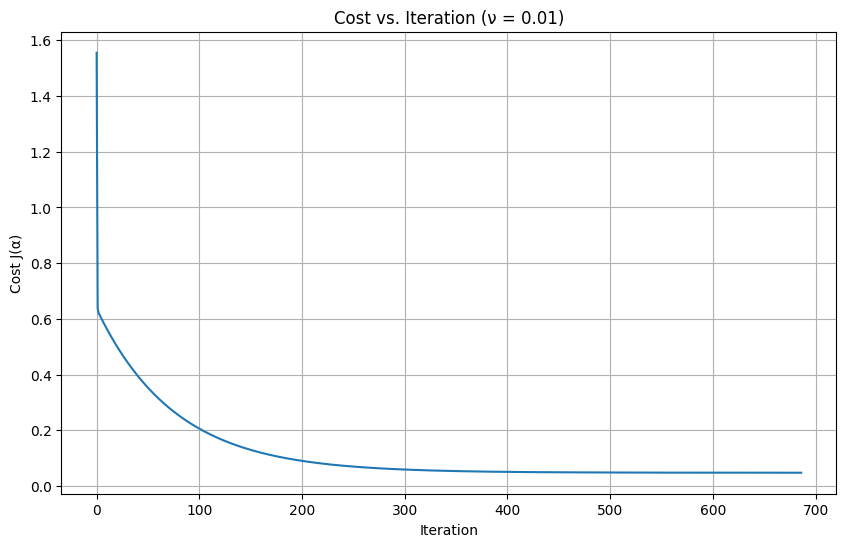


Comparison of coefficients:
Gradient Descent: α₀ = 0.3223, α₁ = 0.3606, α₂ = -0.5768
Direct Solution: α₀ = 0.2069, α₁ = 0.3771, α₂ = -0.5709


In [57]:
step_sizes = [1, 0.1, 0.01, 0.001]

X_iris_2d = irisDataFrame[['sepal_length', 'sepal_width']].values
y_iris = irisDataFrame['label'].values

unnormalized_results = None

for nu in sorted(step_sizes, reverse=True):
    print(f"Testing step size ν = {nu}")
    alpha_gd, J_history, converged = gradient_descent_lls(X_iris_2d, y_iris, step_size=nu)
    
    if converged:
        print(f"Step size ν = {nu} converged")
        
        unnormalized_results = {
            'nu': nu,
            'J_history': J_history,
            'alpha': alpha_gd
        }

        plt.figure(figsize=(10, 6))
        plt.plot(J_history)
        plt.xlabel('Iteration')
        plt.ylabel('Cost J(α)')
        plt.title(f'Cost vs. Iteration (ν = {nu})')
        plt.grid(True)
        plt.show()
        
        print("\nComparison of coefficients:")
        print(f"Gradient Descent: α₀ = {alpha_gd[0]:.4f}, " + 
              f"α₁ = {alpha_gd[1]:.4f}, " + 
              f"α₂ = {alpha_gd[2]:.4f}")
        print(f"Direct Solution: α₀ = {alpha_iris[0]:.4f}, " + 
              f"α₁ = {alpha_iris[1]:.4f}, " + 
              f"α₂ = {alpha_iris[2]:.4f}")
        break
        
    else:
        print(f"Step size ν = {nu} did not converge")

Testing step size ν = 1
Step size ν = 1 did not converge
Testing step size ν = 0.1
Step size ν = 0.1 converged


/home/nick-pc/Projects/Machine_Learning_Internship/venv/lib/python3.11/site-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/tmp/ipykernel_8900/2374996303.py:41: RuntimeWarning: invalid value encountered in scalar subtract
  if step > 0 and abs(J_history[step] - J_history[step-1]) < tol:
/tmp/ipykernel_8900/2374996303.py:35: RuntimeWarning: overflow encountered in square
  J = (1/n_samples) * np.sum((y_pred - y)**2)
/tmp/ipykernel_8900/2374996303.py:33: RuntimeWarning: overflow encountered in matmul
  y_pred = X_hat @ alpha
/tmp/ipykernel_8900/2374996303.py:37: RuntimeWarning: invalid value encountered in matmul
  grad_J = (2/n_samples) * X_hat.T @ (y_pred - y)


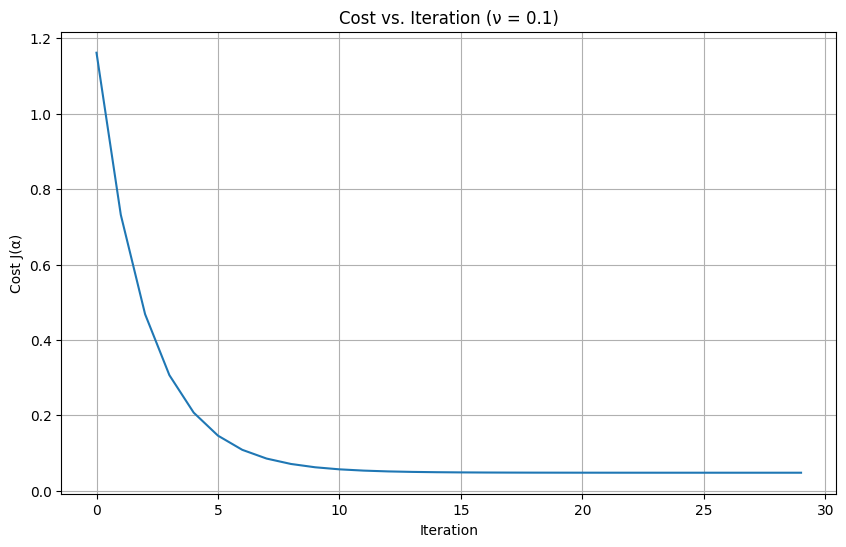


Comparison of coefficients:
Gradient Descent: α₀ = 0.6665, α₁ = 0.3125, α₂ = -0.2465
Direct Solution: α₀ = 0.2069, α₁ = 0.3771, α₂ = -0.5709


In [58]:
irisDataFrame2d = irisDataFrame[['sepal_length', 'sepal_width']]

means = irisDataFrame2d.mean()
stds = irisDataFrame2d.std()

irisDataFrame2d_norm = (irisDataFrame2d - means) / stds

X_iris_2d_norm = irisDataFrame2d_norm.values
normalized_results = None

for nu in sorted(step_sizes, reverse=True):
    print(f"Testing step size ν = {nu}")
    alpha_gd, J_history, converged = gradient_descent_lls(X_iris_2d_norm, y_iris, step_size=nu)
    
    if converged:
        print(f"Step size ν = {nu} converged")
        
        normalized_results = {
            'nu': nu,
            'J_history': J_history,
            'alpha': alpha_gd
        }
        
        plt.figure(figsize=(10, 6))
        plt.plot(J_history)
        plt.xlabel('Iteration')
        plt.ylabel('Cost J(α)')
        plt.title(f'Cost vs. Iteration (ν = {nu})')
        plt.grid(True)
        plt.show()
        
        print("\nComparison of coefficients:")
        print(f"Gradient Descent: α₀ = {alpha_gd[0]:.4f}, " + 
              f"α₁ = {alpha_gd[1]:.4f}, " + 
              f"α₂ = {alpha_gd[2]:.4f}")
        print(f"Direct Solution: α₀ = {alpha_iris[0]:.4f}, " + 
              f"α₁ = {alpha_iris[1]:.4f}, " + 
              f"α₂ = {alpha_iris[2]:.4f}")
        break
        
    else:
        print(f"Step size ν = {nu} did not converge")

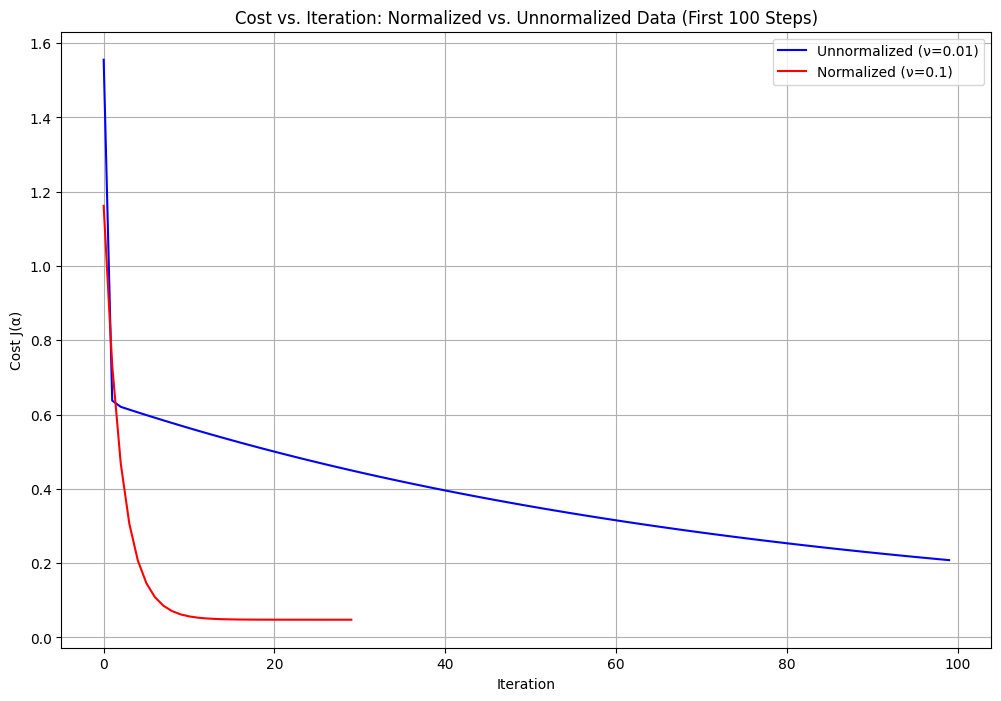

In [60]:

plt.figure(figsize=(12, 8))

# Plot unnormalized data (first 100 iterations or all if less than 100)
iterations = min(100, len(unnormalized_results['J_history']))
plt.plot(range(iterations), unnormalized_results['J_history'][:iterations], 
        'b-', label=f'Unnormalized (ν={unnormalized_results["nu"]})')

# Plot normalized data (first 100 iterations or all if less than 100)
iterations = min(100, len(normalized_results['J_history']))
plt.plot(range(iterations), normalized_results['J_history'][:iterations], 
        'r-', label=f'Normalized (ν={normalized_results["nu"]})')

plt.xlabel('Iteration')
plt.ylabel('Cost J(α)')
plt.title('Cost vs. Iteration: Normalized vs. Unnormalized Data (First 100 Steps)')
plt.legend()
plt.grid(True)
plt.show()

- [ ] Write down observations

In [66]:
def knn_classifier(X_train, y_train, X_test, k):
    """
    k-nearest neighbors classifier.
    
    Parameters:
    X_train -- Training data, shape (n_train_samples, n_features)
    y_train -- Training labels, shape (n_train_samples,)
    X_test -- Test data, shape (n_test_samples, n_features)
    k -- Number of neighbors
    
    Returns:
    y_pred -- Predicted labels
    y_pred_proba -- Predicted probabilities
    """
 
    distances = cdist(X_test, X_train, 'euclidean')

    nearest_indices = np.argpartition(distances, k, axis=1)[:, :k]
    nearest_labels = y_train[nearest_indices]

    y_pred_proba = np.mean(nearest_labels, axis=1)
    
    y_pred = (y_pred_proba >= 0.5).astype(int)
    
    return y_pred, y_pred_proba

def confusion_matrix_2(y_true, y_pred):
    """Build confusion matrix for binary classification."""
    C = np.zeros((2, 2), dtype=int)
    y_true_int = y_true.astype(int)
    y_pred_int = y_pred.astype(int)
    for i in range(len(y_true)):
        C[y_pred_int[i], y_true_int[i]] += 1
    return C

def plot_knn_decision_boundary(X, y, k, title):
    """Plot data points and KNN decision boundary."""
    plt.figure(figsize=(10, 8))
    
    plt.scatter(X[y==0, 0], X[y==0, 1], color='blue', label='Class 0', alpha=0.7)
    plt.scatter(X[y==1, 0], X[y==1, 1], color='red', label='Class 1', alpha=0.7)
    
    margin = 1.0
    x1_min, x1_max = X[:, 0].min() - margin, X[:, 0].max() + margin
    x2_min, x2_max = X[:, 1].min() - margin, X[:, 1].max() + margin
    xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max, 100), 
                         np.linspace(x2_min, x2_max, 100))

    grid_points = np.c_[xx1.ravel(), xx2.ravel()]
    
    _, grid_proba = knn_classifier(X, y, grid_points, k)
    Z = grid_proba.reshape(xx1.shape)
    
    plt.contour(xx1, xx2, Z, levels=[0.5], colors='black', linewidths=2)
    plt.contourf(xx1, xx2, Z, levels=[0, 0.5, 1], colors=['skyblue', 'salmon'], alpha=0.3)
    
    plt.xlabel('$x_1$')
    plt.ylabel('$x_2$')
    plt.title(title)
    plt.grid(alpha=0.3)
    plt.legend()
    plt.show()





Results for k = 1:
Confusion Matrix:
[[100   0]
 [  0 100]]
Accuracy: 1.0000 (100.00%)


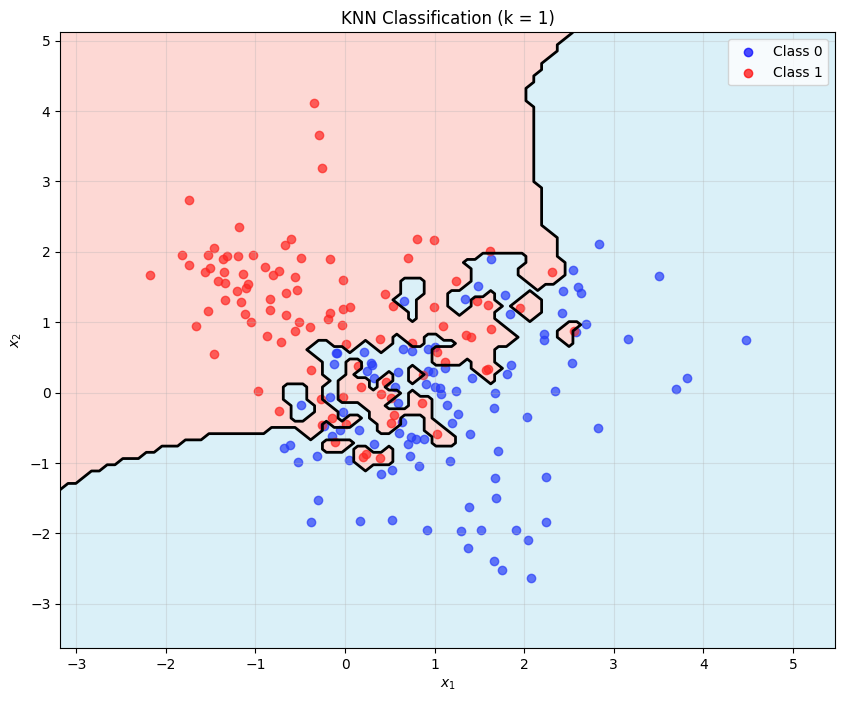


Results for k = 15:
Confusion Matrix:
[[90 25]
 [10 75]]
Accuracy: 0.8250 (82.50%)


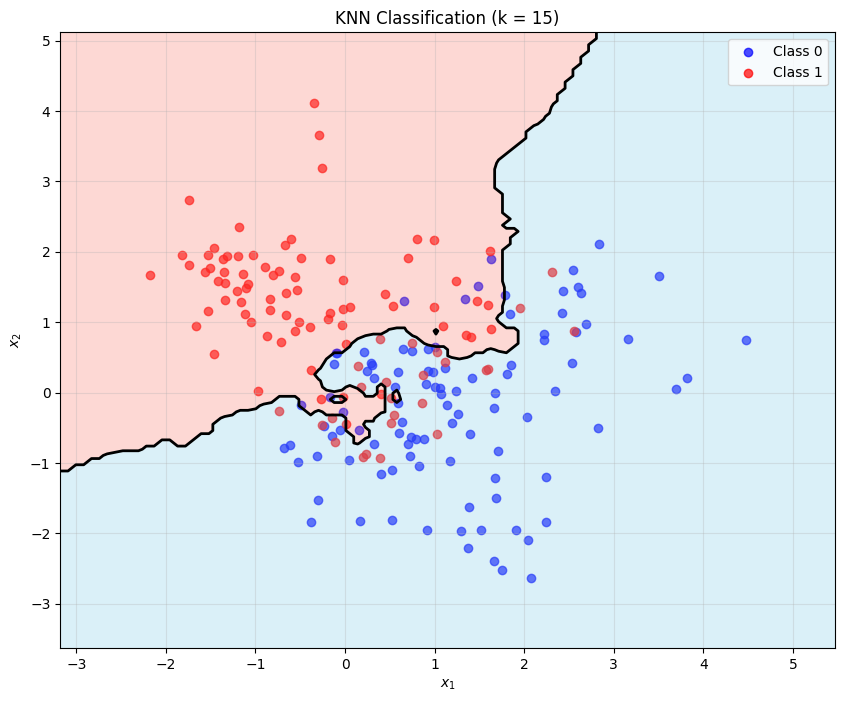


Results for k = 30:
Confusion Matrix:
[[89 27]
 [11 73]]
Accuracy: 0.8100 (81.00%)


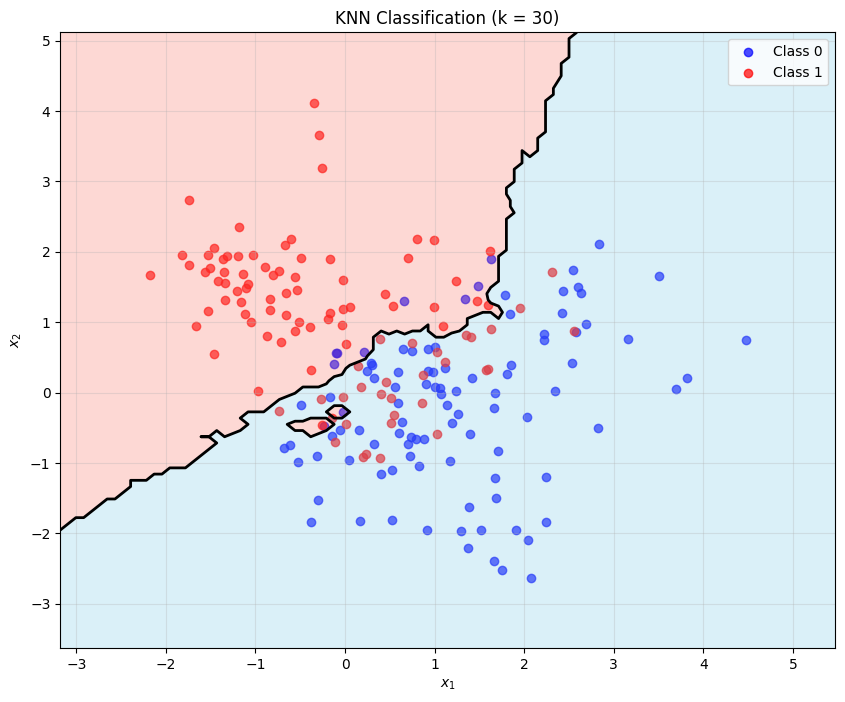

In [65]:
k_values = [1, 15, 30]

for k in k_values:
    print(f"\nResults for k = {k}:")
    
    y_pred, _ = knn_classifier(x, y, x, k)
    C = confusion_matrix_2(y, y_pred)
    accuracy = np.trace(C) / np.sum(C)
    
    print(f"Confusion Matrix:")
    print(C)
    print(f"Accuracy: {accuracy:.4f} ({accuracy*100:.2f}%)")
    
    plot_knn_decision_boundary(x, y, k, f'KNN Classification (k = {k})')


Results for k = 1:
Accuracy: 1.0000 (100.00%)

Results for k = 2:
Accuracy: 0.8750 (87.50%)

Results for k = 3:
Accuracy: 0.8300 (83.00%)

Results for k = 4:
Accuracy: 0.8350 (83.50%)

Results for k = 5:
Accuracy: 0.8250 (82.50%)

Results for k = 6:
Accuracy: 0.8000 (80.00%)

Results for k = 7:
Accuracy: 0.8200 (82.00%)

Results for k = 8:
Accuracy: 0.8050 (80.50%)

Results for k = 9:
Accuracy: 0.8400 (84.00%)

Results for k = 10:
Accuracy: 0.8500 (85.00%)

Results for k = 11:
Accuracy: 0.8300 (83.00%)

Results for k = 12:
Accuracy: 0.8400 (84.00%)

Results for k = 13:
Accuracy: 0.8250 (82.50%)

Results for k = 14:
Accuracy: 0.8200 (82.00%)

Results for k = 15:
Accuracy: 0.8250 (82.50%)

Results for k = 16:
Accuracy: 0.8250 (82.50%)

Results for k = 17:
Accuracy: 0.8200 (82.00%)

Results for k = 18:
Accuracy: 0.8200 (82.00%)

Results for k = 19:
Accuracy: 0.8100 (81.00%)

Results for k = 20:
Accuracy: 0.8100 (81.00%)

Results for k = 21:
Accuracy: 0.8150 (81.50%)

Results for k = 22:


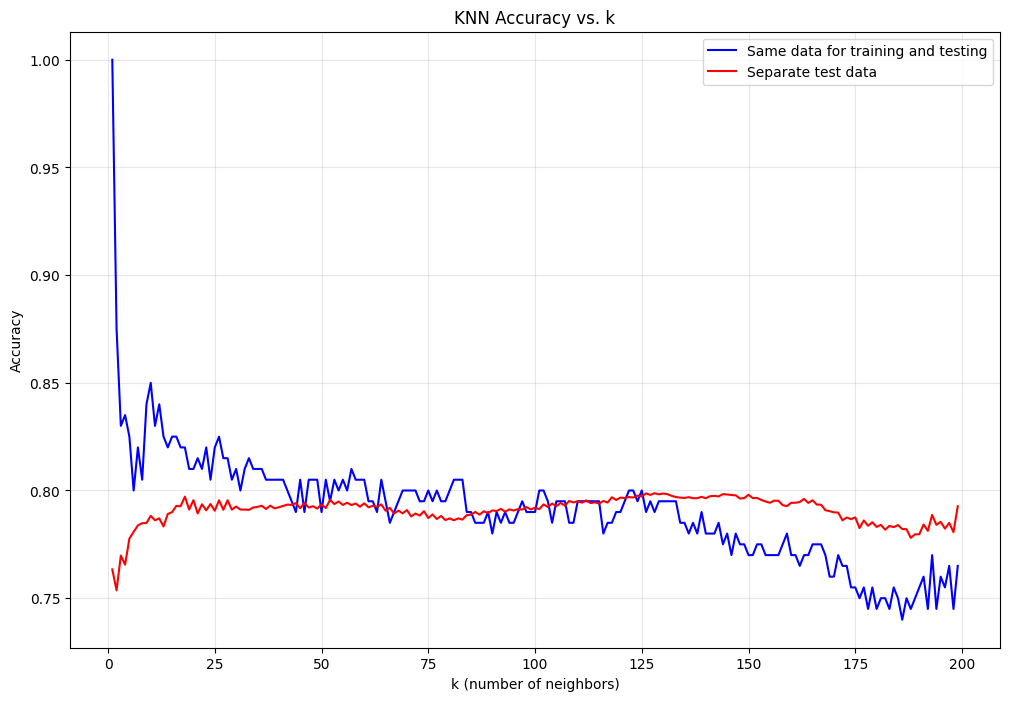

Best k for same data: 1 (accuracy: 1.0000)
Best k for separate test data: 128 (accuracy: 0.7987)


In [ ]:
k_values = [i for i in range(1, 200)]

accuracy_1 = []
accuracy_2 = []

for k in k_values:
    
    y_pred, _ = knn_classifier(x, y, x, k)
    C = confusion_matrix_2(y, y_pred)
    accuracy = np.trace(C) / np.sum(C)
    accuracy_1.append(accuracy)
    
    if not k == 0:
        print(f"\nResults for k = {k}:")
        print(f"Accuracy: {accuracy:.4f} ({accuracy*100:.2f}%)")

for k in k_values:
    
    y_pred, _ = knn_classifier(x, y, x_2, k)
    C = confusion_matrix_2(y_2, y_pred)
    accuracy = np.trace(C) / np.sum(C)
    accuracy_2.append(accuracy)

    if k % 20 == 0:
        print(f"\nResults for k = {k}:")
        print(f"Accuracy: {accuracy:.4f} ({accuracy*100:.2f}%)")

plt.figure(figsize=(12, 8))
plt.plot(k_values, accuracy_1, 'b-', label='Same data for training and testing')
plt.plot(k_values, accuracy_2, 'r-', label='Separate test data')
plt.xlabel('k (number of neighbors)')
plt.ylabel('Accuracy')
plt.title('KNN Accuracy vs. k')
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()